In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

## Dataset exploration

In [62]:
random_state = np.random.seed(0) # for reproducibility

In [50]:
dataset_url = "breast-cancer-data.csv"
df = pd.read_csv(dataset_url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [51]:
df.drop(columns=['Unnamed: 32'], inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [93]:
num_samples = df.shape[0]
print('num_samples:', num_samples)

num_samples: 569


In [52]:
max_of_columns = [(columnName, max(columnData)) for columnName, columnData in df.iteritems()]
max_of_columns.remove(('diagnosis', 'M')) # remove the label column
max_of_columns

[('id', 911320502),
 ('radius_mean', 28.11),
 ('texture_mean', 39.28),
 ('perimeter_mean', 188.5),
 ('area_mean', 2501.0),
 ('smoothness_mean', 0.1634),
 ('compactness_mean', 0.3454),
 ('concavity_mean', 0.4268),
 ('concave points_mean', 0.2012),
 ('symmetry_mean', 0.304),
 ('fractal_dimension_mean', 0.09744),
 ('radius_se', 2.873),
 ('texture_se', 4.885),
 ('perimeter_se', 21.98),
 ('area_se', 542.2),
 ('smoothness_se', 0.03113),
 ('compactness_se', 0.1354),
 ('concavity_se', 0.396),
 ('concave points_se', 0.05279),
 ('symmetry_se', 0.07895),
 ('fractal_dimension_se', 0.02984),
 ('radius_worst', 36.04),
 ('texture_worst', 49.54),
 ('perimeter_worst', 251.2),
 ('area_worst', 4254.0),
 ('smoothness_worst', 0.2226),
 ('compactness_worst', 1.058),
 ('concavity_worst', 1.252),
 ('concave points_worst', 0.291),
 ('symmetry_worst', 0.6638),
 ('fractal_dimension_worst', 0.2075)]

### Normalize the data

In [46]:
columnName, columnData = next(df_max_scaled.iteritems())
print(columnName)
print(columnData.values.dtype)

id
float64


In [192]:
# copy the data
df_max_scaled = df.copy()
df_max_scaled.drop(columns=['id'], inplace=True) # drop 'id' as its an irrelevant feature
for columnName, columnData in df_max_scaled.iteritems():
    if columnName == 'diagnosis':
        continue
    print('Max_val for ' + columnName + ': ' + str(np.max(columnData.values)))
    df_max_scaled[columnName] = columnData.values / np.max(columnData.values)
df_max_scaled.head()

Max_val for radius_mean: 28.11
Max_val for texture_mean: 39.28
Max_val for perimeter_mean: 188.5
Max_val for area_mean: 2501.0
Max_val for smoothness_mean: 0.1634
Max_val for compactness_mean: 0.3454
Max_val for concavity_mean: 0.4268
Max_val for concave points_mean: 0.2012
Max_val for symmetry_mean: 0.304
Max_val for fractal_dimension_mean: 0.09744
Max_val for radius_se: 2.873
Max_val for texture_se: 4.885
Max_val for perimeter_se: 21.98
Max_val for area_se: 542.2
Max_val for smoothness_se: 0.03113
Max_val for compactness_se: 0.1354
Max_val for concavity_se: 0.396
Max_val for concave points_se: 0.05279
Max_val for symmetry_se: 0.07895
Max_val for fractal_dimension_se: 0.02984
Max_val for radius_worst: 36.04
Max_val for texture_worst: 49.54
Max_val for perimeter_worst: 251.2
Max_val for area_worst: 4254.0
Max_val for smoothness_worst: 0.2226
Max_val for compactness_worst: 1.058
Max_val for concavity_worst: 1.252
Max_val for concave points_worst: 0.291
Max_val for symmetry_worst: 0.6638

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.639986,0.264257,0.651459,0.400240,0.724602,0.803706,0.703140,0.731113,0.795724,...,0.704218,0.349818,0.734873,0.474612,0.728661,0.629112,0.568610,0.912027,0.693130,0.573012
1,M,0.731768,0.452393,0.705040,0.530188,0.518605,0.227678,0.203608,0.348757,0.596053,...,0.693396,0.472547,0.632166,0.459803,0.556155,0.176371,0.192971,0.639175,0.414281,0.429012
2,M,0.700462,0.540988,0.689655,0.481008,0.670747,0.462942,0.462512,0.635686,0.680592,...,0.653996,0.515341,0.607086,0.401740,0.648697,0.401229,0.359744,0.835052,0.544290,0.422072
3,M,0.406261,0.518839,0.411565,0.154378,0.872093,0.821946,0.565604,0.522863,0.854276,...,0.413707,0.534921,0.393591,0.133451,0.942498,0.818809,0.548642,0.884880,1.000000,0.833735
4,M,0.721807,0.365071,0.716711,0.518593,0.613831,0.384482,0.463918,0.518390,0.595066,...,0.625416,0.336496,0.605892,0.370240,0.617251,0.193762,0.319489,0.558419,0.356131,0.370024


In [82]:
df_max_scaled['diagnosis']=df_max_scaled['diagnosis'].map({'M':1,'B':0})

num_malignant: 212
num_benign: 357


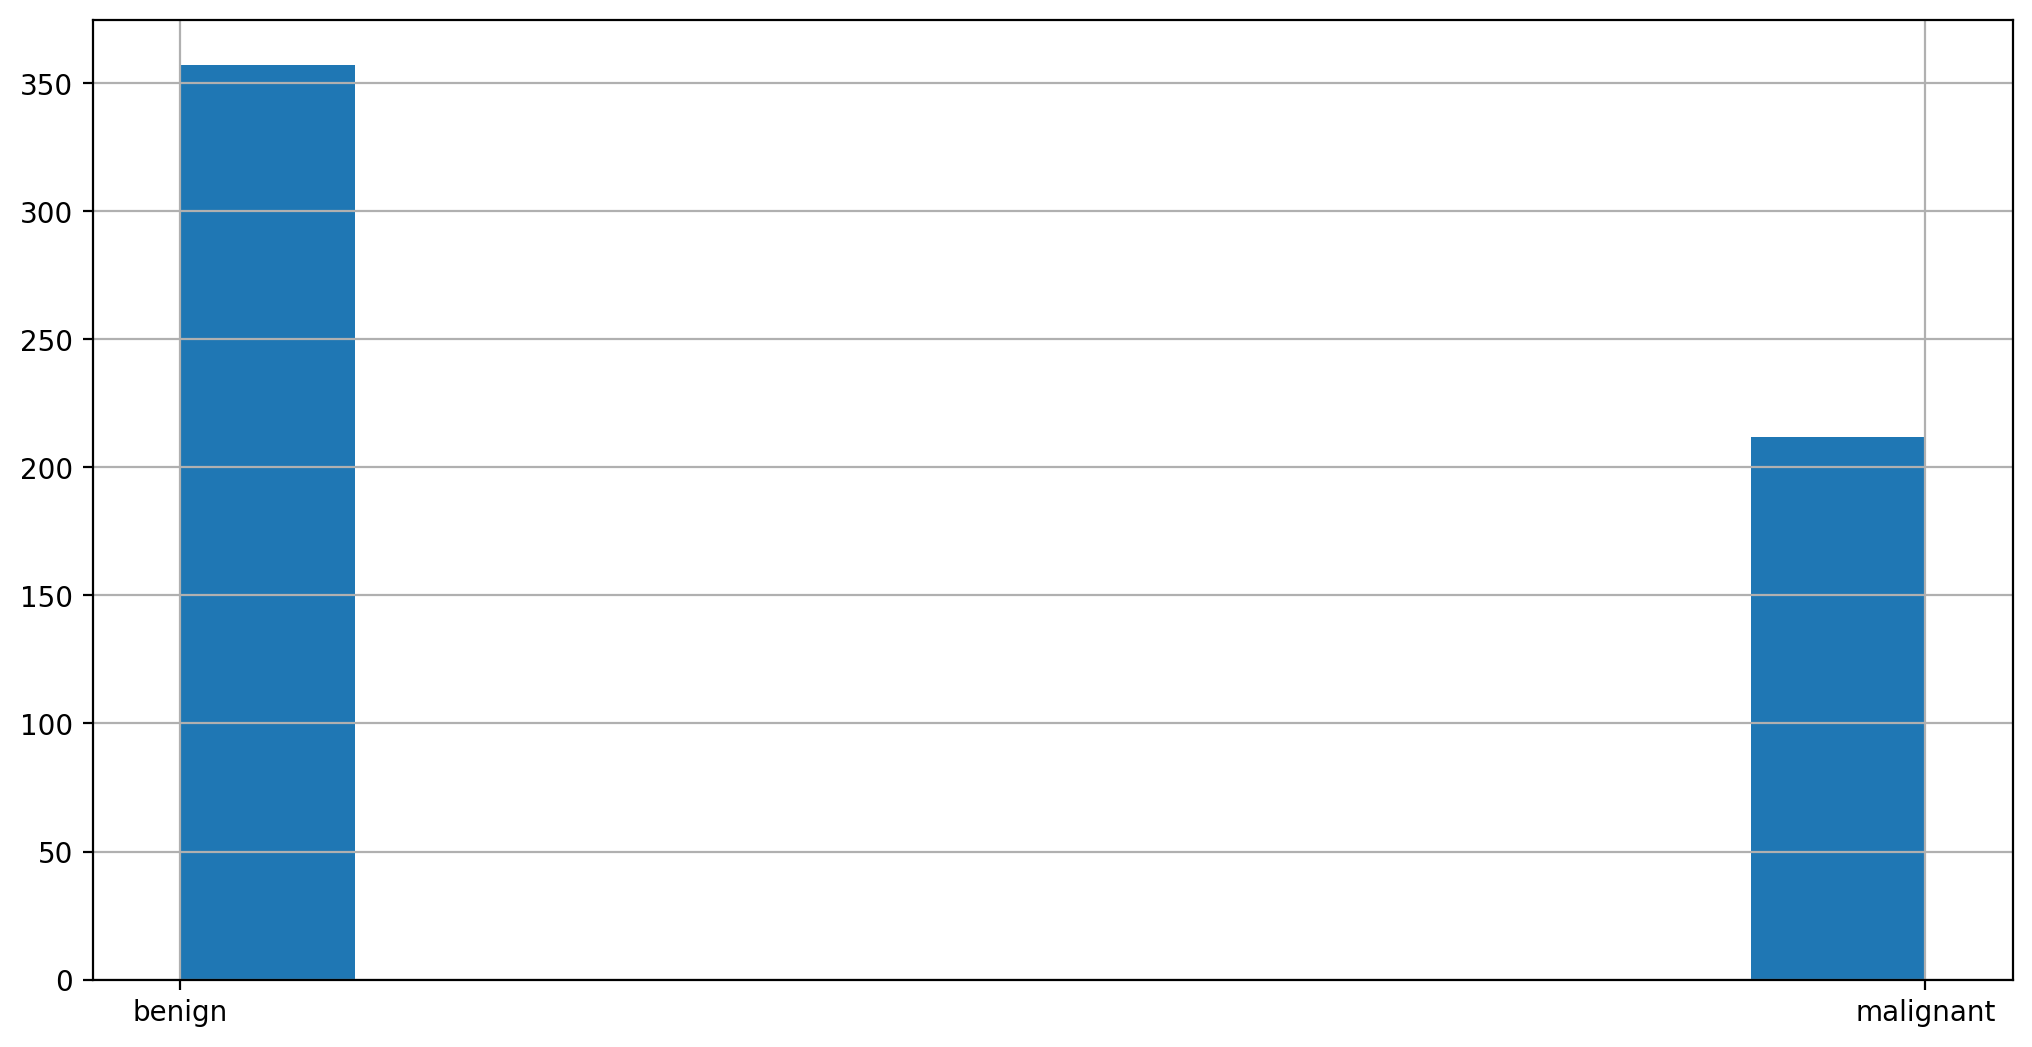

In [140]:
num_malignant = sum([1 for d in df_max_scaled['diagnosis'] if d==1])
print('num_malignant:', num_malignant)
num_benign = sum([1 for d in df_max_scaled['diagnosis'] if d==0])
print('num_benign:', num_benign)

fig = plt.figure(figsize=(12,6), dpi=200)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
plt.hist(df_max_scaled['diagnosis'], rwidth = 5)
ax.set_xticks([0, 1])
ax.set_xticklabels(['benign', 'malignant'])
plt.grid(True)

### Feature selection

In [83]:
all_features = list(df_max_scaled.columns)
all_features.remove('diagnosis')
# all_features

In [84]:
train, test = train_test_split(df_max_scaled, test_size = 0.2, random_state=random_state)

train_X = train[all_features]
train_y = train.diagnosis

test_X = test[all_features]
test_y = test.diagnosis

# initial score using all the features

model=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=random_state)
model.fit(train_X,train_y)

prediction=model.predict(test_X)
init_score = metrics.accuracy_score(prediction,test_y)
init_score

0.9736842105263158

In [141]:
# remove one feature at a time to see its importance

scores = []

for i, c in enumerate(all_features):
    dataX_tr = train_X.copy()
    dataX_ts = test_X.copy()
    dataX_tr.drop(columns=[c], inplace=True)
    dataX_ts.drop(columns=[c], inplace=True)
    
    model=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=random_state)
    model.fit(dataX_tr,train_y)

    prediction=model.predict(dataX_ts)
    score = metrics.accuracy_score(prediction,test_y)
    scores.append(score - init_score)

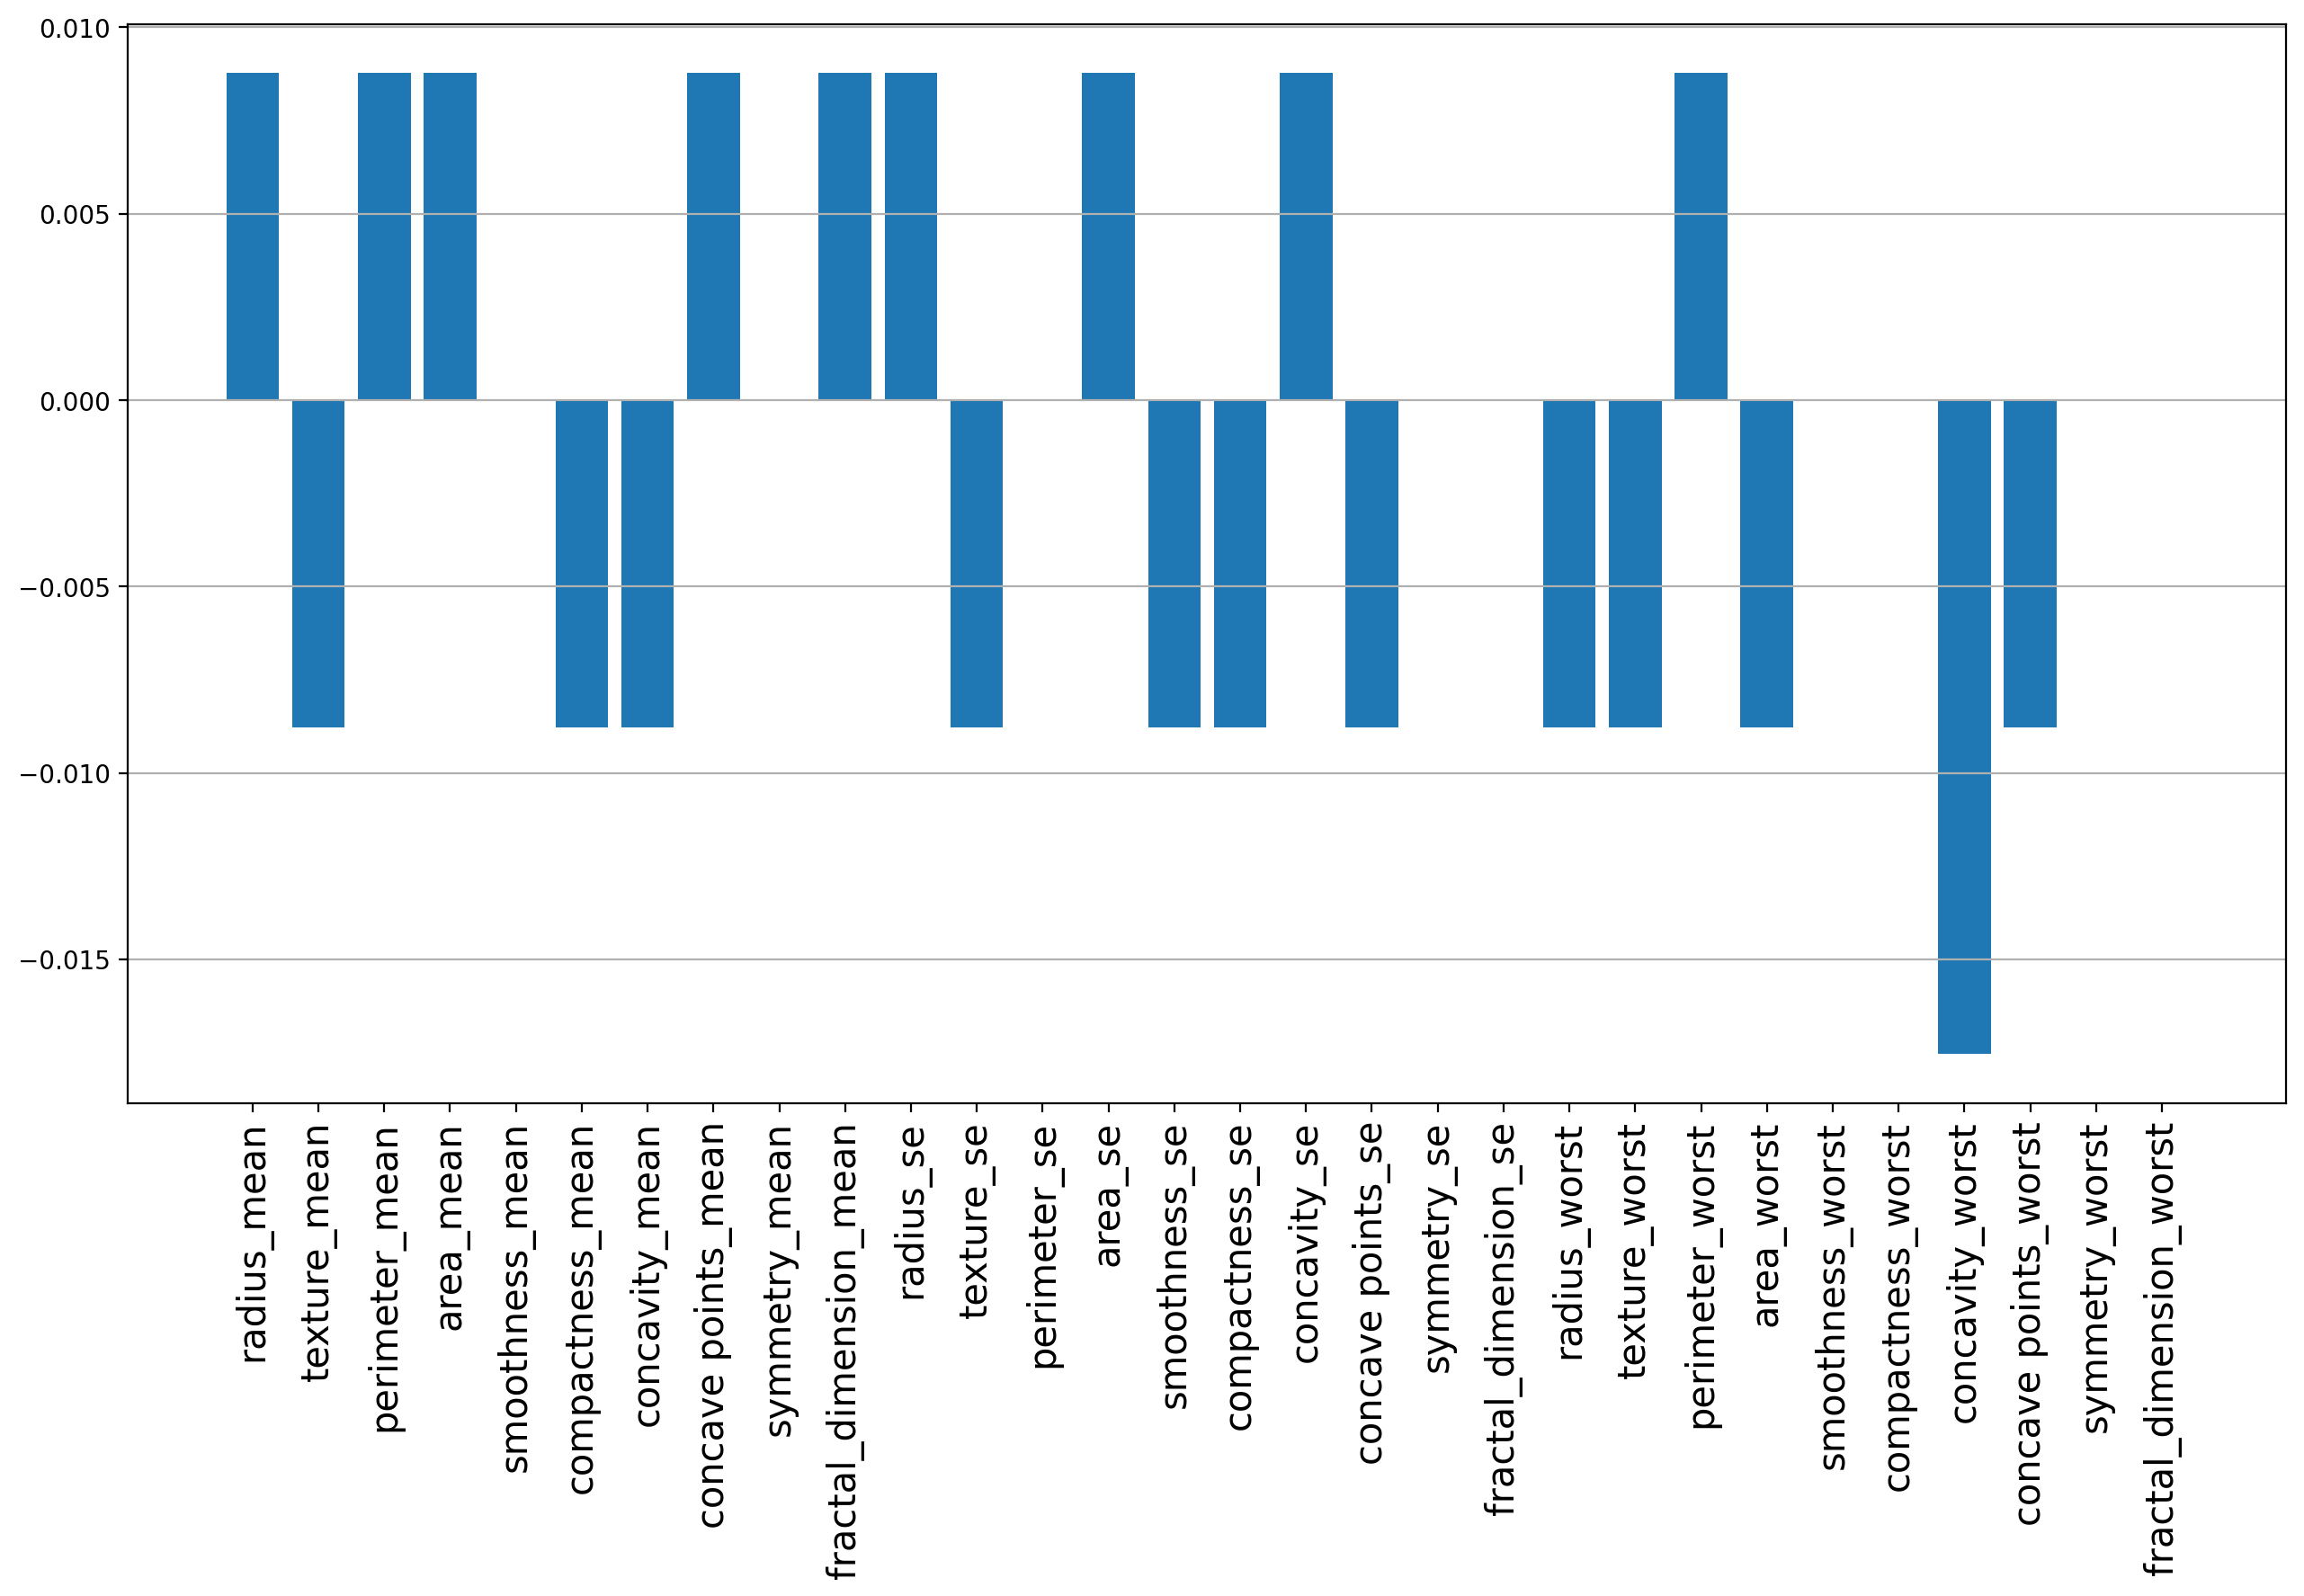

In [142]:
fig = plt.figure(figsize=(12,6), dpi=200)
ax = fig.add_axes([0,0,1,1])
ax.bar(all_features, scores)
plt.xticks(fontsize=15, rotation=90)
plt.grid(axis='y')
plt.show()

In [143]:
min_indices = np.array(scores).argsort()[:5]
most_imp_feats = [all_features[m] for m in min_indices]
print('Most important 5 features:\n', most_imp_feats)

Most important 5 features:
 ['concavity_worst', 'smoothness_se', 'texture_mean', 'concave points_worst', 'compactness_mean']


## Model training

In [144]:
X_train = train[most_imp_feats]
X_test = test[most_imp_feats]

In [166]:
# random forest

model=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=random_state)
model.fit(X_train,train_y)
filename = 'random_forest.sav'
pickle.dump(model, open(filename, 'wb'))
prediction=model.predict(X_test)
score = metrics.accuracy_score(prediction,test_y)
print('Accuracy:', score)
print(metrics.classification_report(prediction,test_y))
rf_report = metrics.classification_report(prediction,test_y, output_dict=True)

Accuracy: 0.9210526315789473
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        73
           1       0.85      0.95      0.90        41

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



In [167]:
# Support vector machine

model=SVC(random_state=random_state)
model.fit(X_train,train_y)
filename = 'svm.sav'
pickle.dump(model, open(filename, 'wb'))
prediction=model.predict(X_test)
score = metrics.accuracy_score(prediction,test_y)
print('Accuracy:', score)
print(metrics.classification_report(prediction,test_y))
svm_report = metrics.classification_report(prediction,test_y, output_dict=True)

Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        73
           1       0.87      0.98      0.92        41

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.93       114
weighted avg       0.94      0.94      0.94       114



In [168]:
# k-NN

model=KNeighborsClassifier()
model.fit(X_train,train_y)
filename = 'knn.sav'
pickle.dump(model, open(filename, 'wb'))
prediction=model.predict(X_test)
score = metrics.accuracy_score(prediction,test_y)
print('Accuracy:', score)
print(metrics.classification_report(prediction,test_y))
knn_report = metrics.classification_report(prediction,test_y, output_dict=True)

Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [172]:
# MLP

model=MLPClassifier(max_iter=1000)
model.fit(X_train,train_y)
filename = 'mlp.sav'
pickle.dump(model, open(filename, 'wb'))
prediction=model.predict(X_test)
score = metrics.accuracy_score(prediction,test_y)
print('Accuracy:', score)
print(metrics.classification_report(prediction,test_y))
mlp_report = metrics.classification_report(prediction,test_y, output_dict=True)

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        74
           1       0.87      1.00      0.93        40

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



#### It can be seen that the k-NN is the best performing model among others with the accuracy of 96%. Next, we will perform hyperparameter optimization using the grid search method on the k-NN classifier.

### Grid Search

In [185]:
n_neighbors = [3, 4, 5, 6, 7, 8]
leaf_size = [10, 20, 30, 40, 50, 100]

best_acc = 0.956140350877193
filename = 'knn.sav'
acc_lst = np.zeros((len(n_neighbors), len(leaf_size)))

for i, n in enumerate(n_neighbors):
    for j, l in enumerate(leaf_size):
        model=KNeighborsClassifier(n_neighbors=n, leaf_size=l)
        model.fit(X_train, train_y)
        prediction=model.predict(X_test)
        score = metrics.accuracy_score(prediction,test_y)
        acc_lst[i, j] = score
        print('Acc when n_neighbors: {}, leaf_size: {} = {}'.format(n, l, score))
        
        if score > best_acc:
            pickle.dump(model, open(filename, 'wb'))
            best_acc = score
            best_report = metrics.classification_report(prediction, test_y, output_dict=True)

Acc when n_neighbors: 3, leaf_size: 10 = 0.956140350877193
Acc when n_neighbors: 3, leaf_size: 20 = 0.956140350877193
Acc when n_neighbors: 3, leaf_size: 30 = 0.956140350877193
Acc when n_neighbors: 3, leaf_size: 40 = 0.956140350877193
Acc when n_neighbors: 3, leaf_size: 50 = 0.956140350877193
Acc when n_neighbors: 3, leaf_size: 100 = 0.956140350877193
Acc when n_neighbors: 4, leaf_size: 10 = 0.9473684210526315
Acc when n_neighbors: 4, leaf_size: 20 = 0.9473684210526315
Acc when n_neighbors: 4, leaf_size: 30 = 0.9473684210526315
Acc when n_neighbors: 4, leaf_size: 40 = 0.9473684210526315
Acc when n_neighbors: 4, leaf_size: 50 = 0.9473684210526315
Acc when n_neighbors: 4, leaf_size: 100 = 0.9473684210526315
Acc when n_neighbors: 5, leaf_size: 10 = 0.956140350877193
Acc when n_neighbors: 5, leaf_size: 20 = 0.956140350877193
Acc when n_neighbors: 5, leaf_size: 30 = 0.956140350877193
Acc when n_neighbors: 5, leaf_size: 40 = 0.956140350877193
Acc when n_neighbors: 5, leaf_size: 50 = 0.95614

In [186]:
best_acc

0.956140350877193

### inference

In [188]:
load_model = pickle.load(open('knn.sav', 'rb'))

In [189]:
prediction=load_model.predict(X_test)
score = metrics.accuracy_score(prediction,test_y)
score

0.956140350877193